In [42]:
import os
import math

import cv2
import numpy as np
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

import pickle
import random

In [43]:
def rotate(inputs, radians):
    output = []
    for i in range(len(inputs)):
        if i%3 == 0: # x value
            x = inputs[i]
            y = inputs[i+1]

            output.append(x * math.cos(radians) + y * math.sin(radians)) 
            output.append(-x * math.sin(radians) + y * math.cos(radians))
            output.append(inputs[i+2])
    return torch.Tensor(np.array([output]))

def generalizeData(x,y):
    for index, value in enumerate(x):
        for i in range(2):
            
            randRotation = random.uniform(math.pi/2, math.pi)
            randScale = random.uniform(.5, 1.5)
            rotatedArray = rotate(value, randRotation)
            
            for i in range(2):
                rotatedArray[i::3] *= randScale
            
            x = torch.concat([x, rotatedArray])
            y = torch.concat([y, torch.Tensor(y[index]).view(-1,len(y[0]))])
        
    # for x_array in x:
    #     for i in range(3):
    #         print(x_array)
    #         x_array[i::3] = preprocessing.normalize([x_array[i::3]])
        
    return torch.Tensor(x), torch.Tensor(y)

In [44]:
def loadData (dataName):
    dataset = np.load(f"datasets/{dataName}.npy", allow_pickle=True)
    print(np.array([i[0] for i in dataset]).shape)
    
    x = torch.Tensor(np.array([i[0] for i in dataset]))
    print(x[0])
    y = torch.Tensor(np.array([i[1] for i in dataset]))
    
    # x, y = generalizeData(x, y)
    
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=42)
    
    return train_x, test_x, train_y, test_y

In [45]:
savetrainedModel = True

device = torch.device("cpu")

In [46]:
modelFileName = ["one_mv1", "one_mv2_9", "twos_mv1", "twos_mv2"]
dataFileName = ["hands_xy_NN", "one_xyz_9","two_rand", "two_9", "two_5" ]

model = pickle.load(open(f"models/untrained/{modelFileName[3]}", 'rb'))
model.to(device)

Sequential(
  (0): Linear(in_features=120, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Linear(in_features=256, out_features=256, bias=True)
  (7): ReLU()
  (8): Linear(in_features=256, out_features=128, bias=True)
  (9): ReLU()
  (10): Linear(in_features=128, out_features=84, bias=True)
)

In [47]:
train_x, test_x, train_y, test_y = loadData (dataFileName[4])
print(f"({len(train_x)+len(test_x)}, 120)")

(17088, 120)
tensor([ 0.2010, -0.0366, -0.1791,  0.3409, -0.1211, -0.2011,  0.3696, -0.2132,
        -0.2500,  0.4106, -0.2786, -0.2439,  0.2916, -0.2201,  0.1267,  0.3267,
        -0.3003, -0.1888,  0.2995, -0.2346, -0.3419,  0.2672, -0.1890, -0.3730,
         0.1787, -0.2272,  0.1032,  0.2197, -0.2997, -0.2298,  0.1998, -0.2143,
        -0.3082,  0.1759, -0.1770, -0.2607,  0.0628, -0.2241,  0.0153,  0.1031,
        -0.2903, -0.3392,  0.0950, -0.2082, -0.2207,  0.0732, -0.1725, -0.0263,
        -0.0691, -0.2147, -0.0884, -0.0130, -0.2721, -0.2804, -0.0010, -0.2201,
        -0.1346, -0.0179, -0.1916,  0.0455,  0.6456,  0.3667,  0.4019,  0.5623,
         0.4048,  0.6724,  0.6040,  0.6793,  0.6951,  0.6452,  0.2092,  0.7970,
         0.2654,  0.0477,  0.0692,  0.2958,  0.3174,  0.1938,  0.7761,  0.5534,
         0.0031,  0.0331,  0.5989,  0.1186,  0.0179,  0.2936,  0.4327,  0.8811,
         0.3314,  0.2569,  0.7290,  0.3562,  0.2351,  0.9884,  0.9788,  0.9179,
         0.7741,  0.1405,  

In [48]:
# train_x[0].shape
model(train_x[0].to(device))

tensor([ 0.0712, -0.0832, -0.0145, -0.0065, -0.0411,  0.0187,  0.0320, -0.0151,
        -0.0728,  0.0839, -0.0388, -0.0280,  0.0468,  0.0787, -0.0954, -0.0378,
         0.0788,  0.0870,  0.0243,  0.0746, -0.0164, -0.0675,  0.0263, -0.0018,
         0.0082,  0.0547, -0.0551, -0.0254, -0.0460, -0.0194, -0.0764,  0.0832,
        -0.0758,  0.0538,  0.0136, -0.0751, -0.0414,  0.0200, -0.0188, -0.0455,
        -0.0658,  0.0618,  0.0826,  0.0002,  0.0637,  0.0649,  0.0092, -0.0328,
         0.0207,  0.0115,  0.0918, -0.0437, -0.0562, -0.0403,  0.0133,  0.0409,
        -0.0215, -0.0998,  0.0651, -0.0013,  0.0555,  0.0821,  0.0438, -0.0860,
         0.0976, -0.0376,  0.0684, -0.0546,  0.0449, -0.0768, -0.0979,  0.0173,
         0.0585,  0.0160,  0.0801, -0.0509,  0.0293,  0.0043, -0.0277, -0.0323,
        -0.0297, -0.0571, -0.0153, -0.0235], grad_fn=<AddBackward0>)

In [49]:
print(train_x.shape, train_x[0])

torch.Size([15379, 120]) tensor([-0.0410, -0.1330, -0.0188, -0.0912, -0.2319, -0.0738, -0.1427, -0.2344,
        -0.1258, -0.1840, -0.2302, -0.1790, -0.0408, -0.3344, -0.1518, -0.1357,
        -0.2973, -0.2250, -0.1833, -0.2474, -0.2588, -0.2164, -0.2093, -0.2808,
        -0.0262, -0.2457, -0.1820, -0.1317, -0.2004, -0.2410, -0.1187, -0.1574,
        -0.2329, -0.0937, -0.1518, -0.2337, -0.0207, -0.1384, -0.2098, -0.1225,
        -0.1082, -0.2556, -0.1062, -0.0758, -0.2109, -0.0800, -0.0860, -0.1862,
        -0.0203, -0.0320, -0.2388, -0.1041, -0.0326, -0.2846, -0.0946, -0.0207,
        -0.2600, -0.0707, -0.0265, -0.2403,  0.0426, -0.1466,  0.0078,  0.1067,
        -0.1838, -0.0008,  0.1512, -0.1259, -0.0101,  0.1727, -0.0460, -0.0198,
         0.1414, -0.2003, -0.0592,  0.2201, -0.2301, -0.0814,  0.2659, -0.2417,
        -0.0878,  0.3007, -0.2462, -0.0880,  0.1509, -0.0881, -0.0701,  0.2324,
        -0.0693, -0.0796,  0.2798, -0.0591, -0.0815,  0.3134, -0.0437, -0.0826,
         0.1483

In [50]:
train_y[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

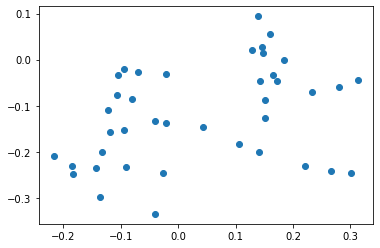

In [51]:
plt.scatter(train_x[0][::3],train_x[0][1::3])

In [52]:
print(train_x[4], train_y[4])
# {'bye': 0, 'hello': 1, 'help': 2, 'no': 3, 'unknown': 4, 'yes': 5, 'you': 6}

tensor([-5.5948e-02, -2.6924e-02, -4.2087e-02, -1.0622e-01, -7.4020e-02,
        -6.5901e-02, -1.5240e-01, -9.4512e-02, -1.0383e-01, -1.9194e-01,
        -1.0126e-01, -1.4383e-01, -4.4992e-02, -1.6127e-01,  4.9433e-02,
        -4.8178e-02, -2.2098e-01,  8.9929e-04, -4.9750e-02, -2.6138e-01,
        -6.2363e-02, -5.1087e-02, -2.9628e-01, -1.1509e-01, -2.5173e-02,
        -1.6300e-01,  6.2658e-03, -3.3078e-02, -2.2854e-01, -3.9023e-02,
        -3.7296e-02, -2.7370e-01, -9.8819e-02, -4.1505e-02, -3.1423e-01,
        -1.4504e-01, -5.6003e-03, -1.5681e-01, -5.5265e-02, -1.6848e-02,
        -2.2154e-01, -1.0698e-01, -2.4950e-02, -2.6656e-01, -1.5477e-01,
        -3.2779e-02, -3.0605e-01, -1.8773e-01,  1.1880e-02, -1.4439e-01,
        -1.2687e-01,  4.1950e-06, -1.9682e-01, -1.7188e-01, -1.0097e-02,
        -2.3160e-01, -1.9500e-01, -2.1039e-02, -2.6249e-01, -2.1283e-01,
         4.6363e-02,  3.1356e-02, -4.8054e-02,  9.8337e-02,  5.3597e-02,
        -9.0965e-02,  1.2647e-01,  8.5271e-02, -1.4

In [53]:
train_x[:2]

tensor([[-0.0410, -0.1330, -0.0188, -0.0912, -0.2319, -0.0738, -0.1427, -0.2344,
         -0.1258, -0.1840, -0.2302, -0.1790, -0.0408, -0.3344, -0.1518, -0.1357,
         -0.2973, -0.2250, -0.1833, -0.2474, -0.2588, -0.2164, -0.2093, -0.2808,
         -0.0262, -0.2457, -0.1820, -0.1317, -0.2004, -0.2410, -0.1187, -0.1574,
         -0.2329, -0.0937, -0.1518, -0.2337, -0.0207, -0.1384, -0.2098, -0.1225,
         -0.1082, -0.2556, -0.1062, -0.0758, -0.2109, -0.0800, -0.0860, -0.1862,
         -0.0203, -0.0320, -0.2388, -0.1041, -0.0326, -0.2846, -0.0946, -0.0207,
         -0.2600, -0.0707, -0.0265, -0.2403,  0.0426, -0.1466,  0.0078,  0.1067,
         -0.1838, -0.0008,  0.1512, -0.1259, -0.0101,  0.1727, -0.0460, -0.0198,
          0.1414, -0.2003, -0.0592,  0.2201, -0.2301, -0.0814,  0.2659, -0.2417,
         -0.0878,  0.3007, -0.2462, -0.0880,  0.1509, -0.0881, -0.0701,  0.2324,
         -0.0693, -0.0796,  0.2798, -0.0591, -0.0815,  0.3134, -0.0437, -0.0826,
          0.1483,  0.0149, -

In [54]:
import matplotlib.pyplot as plt

def train(net, BATCH_SIZE, EPOCHS):
    loss_function = nn.MSELoss()
    loss_x = []
    optimizer = optim.Adam(net.parameters(), lr = 0.001)
    
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_x), BATCH_SIZE)):
            batch_X = train_x[i:i+BATCH_SIZE].view(-1,120).to(device)
            batch_y = train_y[i:i+BATCH_SIZE].to(device)
            
            net.zero_grad()
            
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
        loss_x.append(loss.item())
        print(loss)
        
    plt.plot(loss_x)
    
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_x))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_x[i].view(-1,120).to(device))[0]
            predicted_class = torch.argmax(net_out)
            
            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accuracy: ", round(correct/total, 3))

In [55]:
# model2 = pickle.load(open(f"models/trained/one_t_s1", 'rb'))
# test(model2)

In [56]:
# model3 = pickle.load(open(f"models/trained/one_tg_s1", 'rb'))
# test(model3)

  4%|▍         | 17/440 [00:00<00:02, 157.44it/s]

tensor(0.0063, grad_fn=<MseLossBackward0>)


  3%|▎         | 13/440 [00:00<00:03, 122.71it/s]

tensor(0.0030, grad_fn=<MseLossBackward0>)


  3%|▎         | 13/440 [00:00<00:03, 129.40it/s]

tensor(0.0015, grad_fn=<MseLossBackward0>)


  2%|▏         | 10/440 [00:00<00:04, 91.95it/s]

tensor(0.0008, grad_fn=<MseLossBackward0>)


  3%|▎         | 14/440 [00:00<00:03, 138.56it/s]

tensor(0.0006, grad_fn=<MseLossBackward0>)


  2%|▎         | 11/440 [00:00<00:03, 107.94it/s]

tensor(0.0006, grad_fn=<MseLossBackward0>)


  2%|▎         | 11/440 [00:00<00:03, 108.24it/s]

tensor(0.0002, grad_fn=<MseLossBackward0>)


  2%|▎         | 11/440 [00:00<00:04, 104.40it/s]

tensor(0.0002, grad_fn=<MseLossBackward0>)


  5%|▌         | 23/440 [00:00<00:03, 113.60it/s]

tensor(0.0002, grad_fn=<MseLossBackward0>)


  2%|▎         | 11/440 [00:00<00:04, 103.50it/s]

tensor(0.0002, grad_fn=<MseLossBackward0>)


  4%|▎         | 16/440 [00:00<00:02, 158.05it/s]

tensor(0.0001, grad_fn=<MseLossBackward0>)


  6%|▋         | 28/440 [00:00<00:03, 136.62it/s]

tensor(0.0001, grad_fn=<MseLossBackward0>)


  4%|▎         | 16/440 [00:00<00:02, 156.97it/s]

tensor(9.7870e-05, grad_fn=<MseLossBackward0>)


  4%|▎         | 16/440 [00:00<00:02, 156.03it/s]

tensor(9.0013e-05, grad_fn=<MseLossBackward0>)


  4%|▎         | 16/440 [00:00<00:02, 154.85it/s]

tensor(7.4036e-05, grad_fn=<MseLossBackward0>)


  3%|▎         | 13/440 [00:00<00:03, 126.81it/s]

tensor(0.0001, grad_fn=<MseLossBackward0>)


  3%|▎         | 15/440 [00:00<00:02, 147.93it/s]

tensor(5.5815e-05, grad_fn=<MseLossBackward0>)


  2%|▏         | 10/440 [00:00<00:04, 93.77it/s]

tensor(8.9498e-05, grad_fn=<MseLossBackward0>)


  3%|▎         | 15/440 [00:00<00:02, 145.31it/s]

tensor(7.5007e-05, grad_fn=<MseLossBackward0>)


  3%|▎         | 12/440 [00:00<00:03, 111.33it/s]

tensor(7.8146e-05, grad_fn=<MseLossBackward0>)


  4%|▎         | 16/440 [00:00<00:02, 157.95it/s]

tensor(7.0794e-05, grad_fn=<MseLossBackward0>)


  4%|▎         | 16/440 [00:00<00:02, 156.20it/s]

tensor(5.3754e-05, grad_fn=<MseLossBackward0>)


  2%|▏         | 8/440 [00:00<00:05, 75.48it/s]

tensor(3.5878e-05, grad_fn=<MseLossBackward0>)


  3%|▎         | 15/440 [00:00<00:03, 139.91it/s]

tensor(8.9235e-05, grad_fn=<MseLossBackward0>)


100%|██████████| 440/440 [00:04<00:00, 102.19it/s]


tensor(3.2231e-05, grad_fn=<MseLossBackward0>)


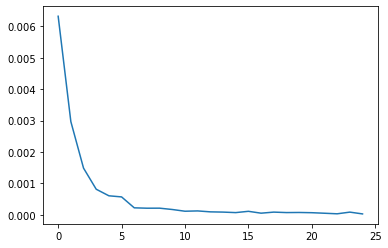

In [57]:
BATCH_SIZE = 35
EPOCHS = 25
train(model, BATCH_SIZE, EPOCHS)

In [58]:
#[yes, other, no, fuck]
print(model(test_x[5].view(-1,120).to(device)), test_y[5])
# plt.imshow(test_x[4].view(30,30), cmap='gray')

tensor([[-4.0646e-03,  3.6270e-03, -3.8287e-03, -1.6982e-03,  2.6977e-03,
          5.6069e-04,  7.0136e-04,  1.7227e-03,  2.1012e-03, -2.1865e-04,
         -1.2622e-03, -3.5063e-03, -1.5728e-03,  1.9442e-03,  2.0965e-04,
          2.6547e-03, -2.8275e-03,  1.1385e-03,  1.7381e-03, -8.8551e-04,
         -2.5569e-03, -4.1397e-03,  4.3696e-04,  9.8759e-04, -1.7637e-03,
         -6.6605e-03, -2.7184e-04,  1.3802e-03, -1.2869e-03,  1.1775e-03,
         -1.3726e-03,  2.4846e-03,  4.1849e-03,  1.9866e-03,  4.5649e-03,
         -7.2876e-04, -6.4464e-03,  2.5207e-03,  1.6929e-03, -1.3956e-03,
          5.6682e-04,  1.6000e-03,  1.1006e-03,  1.1380e-03,  1.0081e+00,
          2.3306e-03,  6.5540e-04, -3.5074e-03, -1.1078e-03,  2.1583e-03,
          1.7477e-04,  2.9147e-03,  1.1738e-03,  1.4734e-03,  3.4732e-03,
         -3.0652e-03,  3.1588e-03, -5.5477e-04,  1.1482e-03, -5.8893e-05,
         -1.3374e-03,  1.4628e-03,  6.9572e-04, -8.9267e-04,  3.0229e-03,
          1.4475e-03, -8.0164e-03, -9.

In [59]:
test(model)

100%|██████████| 1709/1709 [00:00<00:00, 2792.73it/s]

Accuracy:  0.987


In [60]:
test_x.shape

torch.Size([1709, 120])

In [61]:
test_y[:3]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [63]:
if savetrainedModel:
    trainedmodelpath = 'models/trained/'
    pickle.dump(model.to('cpu'), open(trainedmodelpath + "two_84", 'wb'))

In [22]:
# Testing Multiple Functions
# {'bye': 0, 'hello': 1, 'help': 2, 'no': 3, 'unknown': 4, 'yes': 5, 'you': 6}